### imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer import StatevectorSimulator, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile

In [5]:
# This is the qiskit version I used. 
# It's not the latest one so please install this version if you're rerunning the notebook.
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.0', 'qiskit': '0.41.0', 'qiskit-aer': '0.11.2', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.20.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### paste API code

In [59]:
provider.backends()

[<IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>]

In [60]:
backend_q = provider.get_backend('ibm_hanoi')

# simple circuits

In [61]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.h(1)
qc.cx(1, 2)
qc.draw()

┌───┐               
q_0: ┤ H ├──■────────────
     └───┘┌─┴─┐┌───┐     
q_1: ─────┤ X ├┤ H ├──■──
          └───┘└───┘┌─┴─┐
q_2: ───────────────┤ X ├
                    └───┘

In [66]:
qc.draw()

┌───┐                ░ ┌─┐      
   q_0: ┤ H ├──■─────────────░─┤M├──────
        └───┘┌─┴─┐┌───┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├┤ H ├──■───░──╫─┤M├───
             └───┘└───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ───────────────┤ X ├─░──╫──╫─┤M├
                       └───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2

### sim backends

In [62]:
backend_stv = StatevectorSimulator()
backend_aer = AerSimulator()
backend_uni = Aer.get_backend('unitary_simulator')

##### unitary (noiseless)

In [63]:
job_uni = execute(qc, backend_uni).result()
np.array(job_uni.get_unitary(qc, decimals=5))

array([[ 0.5+0.j,  0.5-0.j,  0.5-0.j,  0.5-0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j],
       [ 0.5-0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5-0.j,
        -0.5+0.j, -0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -0.5+0.j,  0.5-0.j,
         0.5+0.j, -0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5-0.j,
         0.5-0.j,  0.5-0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5-0.j, -0.5+0.j,
         0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0.5-0.j, -0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j],
       [-0.5+0.j,  0.5-0.j,  0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j]])

##### state vector (noiseless)

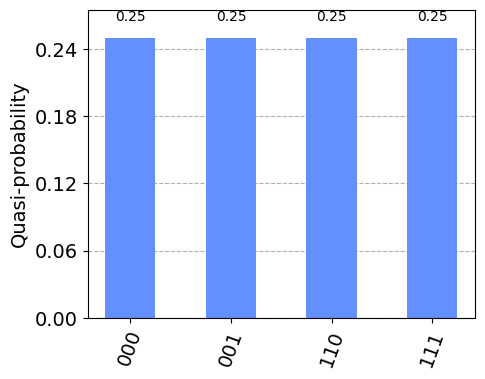

In [64]:
job = backend_stv.run(qc)
plot_histogram(job.result().get_counts(), figsize=(5, 4))

##### aer (shot noise)

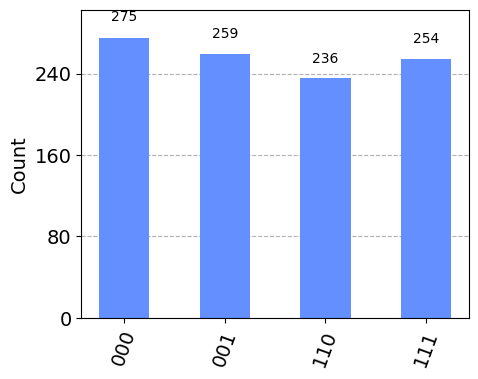

In [65]:
qc.measure_all()
job = backend_aer.run(qc)
plot_histogram(job.result().get_counts(), figsize=(5, 4))

##### real machine

In [67]:
qc_t = transpile(qc, backend=backend_q)
job = backend_q.run(qc_t)
jobid = job.job_id()
print(jobid)

crc7shpdqdn000833geg


In [68]:
job = provider.retrieve_job(jobid)
job.status()
# plot_histogram(job.result().get_counts(), figsize=(5, 4))

<JobStatus.QUEUED: 'job is queued'>

# noisy sim

### fake machine

In [69]:
from qiskit.providers.fake_provider import FakeCairo

backend_cairo = FakeCairo()

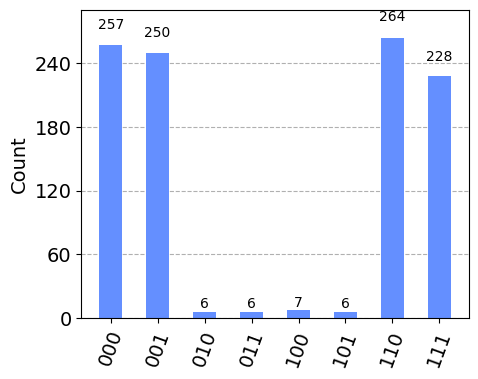

In [70]:
job = backend_cairo.run(qc)
plot_histogram(job.result().get_counts(), figsize=(5, 4))

### decaying of GHZ state (000+111)

In [71]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()
qc.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

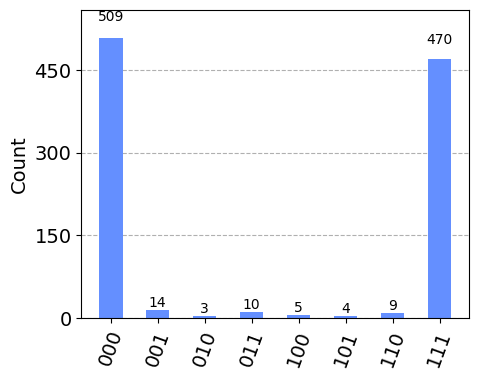

In [72]:
job = backend_cairo.run(qc)
plot_histogram(job.result().get_counts(), figsize=(5, 4))

In [73]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
for rep in range(5):
    qc.barrier()
    qc.cx(0, 1)
    qc.barrier()
    qc.cx(0, 1)
qc.measure_all()
qc.draw(fold=-1)

┌───┐           ░       ░       ░       ░       ░       ░       ░       ░       ░       ░       ░ ┌─┐      
   q_0: ┤ H ├──■────────░───■───░───■───░───■───░───■───░───■───░───■───░───■───░───■───░───■───░───■───░─┤M├──────
        └───┘┌─┴─┐      ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░──╫─┤M├───
             └───┘┌─┴─┐ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░───────░───────░───────░───────░───────░───────░───────░───────░───────░───────░──╫──╫─┤M├
                  └───┘ ░       ░       ░       ░       ░       ░       ░       ░       ░       ░       ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                           0  1  2

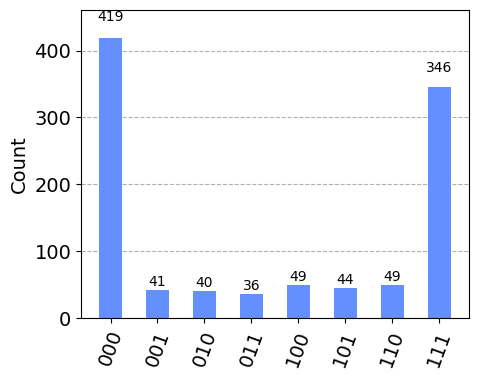

In [74]:
job = backend_cairo.run(qc)
plot_histogram(job.result().get_counts(), figsize=(5, 4))

##### GHZ 3 on real machines

In [75]:
circs = []
for cnots in range(0, 20, 2):

    # CREATE CIRCUIT
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    for rep in range(cnots):
        qc.barrier()
        qc.cx(0, 1)
        qc.barrier()
        qc.cx(0, 1)
    qc.measure_all()

    # TRANSPILE
    qc_t = transpile(qc, backend=backend_q)
    circs.append(qc_t)

In [76]:
job = backend_q.run(circs)
jobid = job.job_id()
print(jobid)

crc7w5gc90400089hcd0


In [ ]:
# jobid_sent_before = 'crc5vsf622j0008m89h0'

In [87]:
job = provider.retrieve_job(jobid)
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
# counts = job.result().get_counts()
# fidelity_real = {}
# for i, cnots in enumerate(range(0, 20, 2)):
#     count = counts[i]
#     fidelity_real[cnots] = (counts['111']+counts['000'])/1024

In [ ]:
# plt.plot(fidelity_real.keys(), fidelity_real.values(), '-o', markersize=10)
# plt.ylabel('fidelity of GHZ')
# plt.xlabel('circuit length (time)')

##### GHZ 3 on fake machine

In [78]:
from qiskit.providers.fake_provider import FakeHanoi

backend_hanoi = FakeHanoi()

In [79]:
fidelity = {}
for cnots in range(0, 20, 2):

    # CREATE CIRCUIT
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    for rep in range(cnots):
        qc.barrier()
        qc.cx(0, 1)
        qc.barrier()
        qc.cx(0, 1)
    qc.measure_all()

    # RUN
    job = backend_hanoi.run(qc)
    counts = job.result().get_counts()
    fidelity[cnots] = (counts['111']+counts['000'])/1024 #shots = 1024

Text(0.5, 0, 'circuit length (time)')

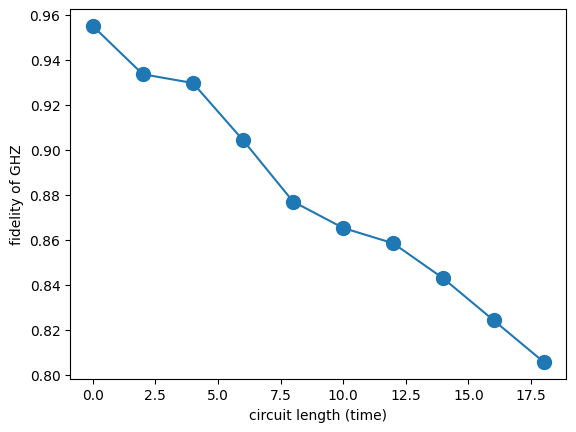

In [80]:
plt.plot(fidelity.keys(), fidelity.values(), '-o', markersize=10)
plt.ylabel('fidelity of GHZ')
plt.xlabel('circuit length (time)')

### T1/T2

##### 0,1 decay (T1: relaxation)

In [83]:
fidelity_0 = {}
fidelity_1 = {}
for cnots in range(0, 1000, 50):

    # CREATE CIRCUIT FOR 1
    qc = QuantumCircuit(1)
    qc.x(0)
    for rep in range(cnots):
        qc.barrier()
        qc.id(0)
        qc.barrier()
        qc.id(0)
    qc.measure_all()

    # RUN
    job = backend_cairo.run(qc)
    counts = job.result().get_counts()
    fidelity_1[cnots] = counts['1']/1024

    ########################################

    # CREATE CIRCUIT FOR 0
    qc = QuantumCircuit(1)
    # qc.x(0)
    for rep in range(cnots):
        qc.barrier()
        qc.id(0)
        qc.barrier()
        qc.id(0)
    qc.measure_all()

    # RUN
    job = backend_cairo.run(qc)
    counts = job.result().get_counts()
    fidelity_0[cnots] = counts['0']/1024

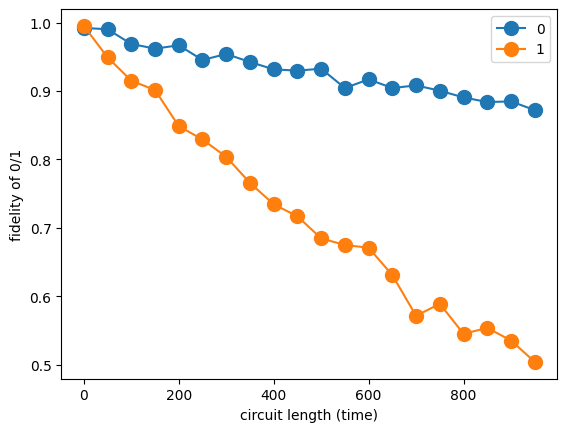

In [84]:
plt.plot(fidelity_0.keys(), fidelity_0.values(), '-o', markersize=10, label='0')
plt.plot(fidelity_1.keys(), fidelity_1.values(), '-o', markersize=10, label='1')
plt.ylabel('fidelity of 0/1')
plt.xlabel('circuit length (time)')
plt.legend()

##### +,- decay (T2: dephasing)

In [85]:
fidelity_0 = {}
fidelity_1 = {}
for cnots in range(0, 50, 2):

    # CREATE CIRCUIT FOR -
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    for rep in range(cnots):
        qc.barrier()
        qc.id(0)

    qc.h(0) # should measure 1
    qc.measure_all()

    # RUN
    job = backend_cairo.run(qc)
    counts = job.result().get_counts()
    fidelity_1[cnots] = counts['1']/1024

    ########################################

    # CREATE CIRCUIT FOR +
    qc = QuantumCircuit(1)
    # qc.x(0)
    qc.h(0)
    for rep in range(cnots):
        qc.barrier()
        qc.id(0)
    qc.h(0) # should measure 0
    qc.measure_all()

    # RUN
    job = backend_cairo.run(qc)
    counts = job.result().get_counts()
    fidelity_0[cnots] = counts['0']/1024

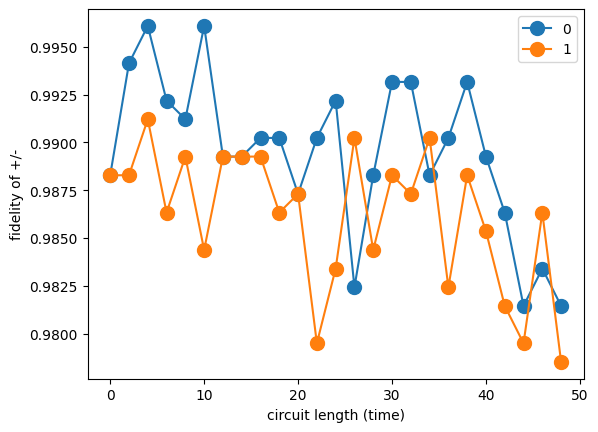

In [86]:
plt.plot(fidelity_0.keys(), fidelity_0.values(), '-o', markersize=10, label='0')
plt.plot(fidelity_1.keys(), fidelity_1.values(), '-o', markersize=10, label='1')
plt.ylabel('fidelity of +/-')
plt.xlabel('circuit length (time)')
plt.legend()